<a href="https://colab.research.google.com/github/relfaza/Tugas_Praktik_SVM/blob/main/Tugas_Praktik_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Farrel Faza 24523031
*   Muhammad Hafizh Hakim 24523062

**1. Pemilihan Dataset & Deskripsi Singkat**

Dataset = Pima Indians Diabetes Dataset

Tujuan = Klasifikasi biner untuk memprediksi apakah pasien menderita Diabetes (1) atau tidak (0).

Sumber = https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# URL Raw CSV untuk Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

try:
    df_diabetes = pd.read_csv(url)
    print("Dataset berhasil dimuat langsung dari URL.")
    print("5 Baris Data Awal:")
    display(df_diabetes.head())
except Exception as e:
    print(f"Error saat memuat data: {e}")

Dataset berhasil dimuat langsung dari URL.
5 Baris Data Awal:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2. Preprocessing Data**

 Langkah ini mencakup penanganan missing value dan scaling data, yang krusial untuk kinerja optimal SVM.


  A. Menangani Missing Value (Imputasi)

  Nilai 0 pada kolom-kolom seperti Glucose, BloodPressure, Insulin, SkinThickness, dan BMI secara fisik tidak mungkin (kecuali Pregnancies) dan dianggap sebagai missing value. Kami akan mengisinya dengan median untuk menghindari bias dari outlier.

In [ ]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 1. Ganti 0 dengan NaN
df_diabetes[cols_to_impute] = df_diabetes[cols_to_impute].replace(0, np.nan)

# 2. Ganti NaN dengan Median
for col in cols_to_impute:
    median_val = df_diabetes[col].median()
    df_diabetes[col].fillna(median_val, inplace=True)

print("Imputasi Median untuk Missing Value Selesai.")
print("Jumlah Missing Values setelah Imputasi:")
print(df_diabetes.isnull().sum())
# Catatan: Encoding tidak diperlukan karena tidak ada fitur kategorikal.

Imputasi Median untuk Missing Value Selesai.
Jumlah Missing Values setelah Imputasi:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-2473828319.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diabetes[col].fillna(median_val, inplace=True)


B. Scaling Data

StandardScaler digunakan untuk menstandardisasi fitur agar memiliki rata-rata nol dan deviasi standar satu. Ini wajib karena SVM sensitif terhadap skala fitur.

In [ ]:
# Pisahkan Fitur (X) dan Target (y)
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Scaling menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaling Data (StandardScaler) Selesai.")
print("5 Baris Data Fitur setelah Scaling:")
display(X_scaled_df.head())

Scaling Data (StandardScaler) Selesai.
5 Baris Data Fitur setelah Scaling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


**3. Split Data**

Data dibagi menjadi 70% untuk pelatihan (train) dan 30% untuk pengujian (test).

In [ ]:
# Split data 70% Train, 30% Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42
)

print(f"Ukuran Training Set (70%): {X_train.shape}")
print(f"Ukuran Testing Set (30%): {X_test.shape}")

Ukuran Training Set (70%): (537, 8)
Ukuran Testing Set (30%): (231, 8)


**4. Modeling SVM + Penjelasan Kernel**

In [ ]:
# Inisialisasi Model dengan Kernel Pilihan
model_svm = SVC(kernel='rbf', random_state=42)

# Latih Model
model_svm.fit(X_train, y_train)

# Prediksi
y_pred = model_svm.predict(X_test)
y_train_pred = model_svm.predict(X_train)

print("Modeling SVM (RBF Kernel) Selesai.")

Modeling SVM (RBF Kernel) Selesai.


Kernel yang Dipakai = RBF (Radial Basis Function), atau sering disebut Gaussian Kernel.

Alasan Singkat Pemilihan = Kernel RBF dipilih karena mampu menangani hubungan non-linier dalam data medis yang kompleks . Kernel ini memproyeksikan fitur ke ruang dimensi yang lebih tinggi, memungkinkan model untuk membuat batas keputusan melengkung yang lebih efektif daripada batas linier pada data non-linier.

**5. Evaluasi Model + Analisis O/U**

In [ ]:
#  Hitung Metrik (Accuracy, Precision, Recall, F1 Score)
# Metrik Test
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Metrik Training (Untuk Analisis O/U)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("--- Hasil Evaluasi (Data Test) ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

--- Hasil Evaluasi (Data Test) ---
Accuracy: 0.7446
Precision: 0.6479
Recall: 0.5750
F1 Score: 0.6093

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# Analisis Singkat Overfitting atau Underfitting
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if abs(train_accuracy - test_accuracy) < 0.05:
    print("Analisis: Model menunjukkan kinerja yang **seimbang** (generalisasi baik), tidak ada tanda Overfitting yang signifikan.")
elif train_accuracy > test_accuracy + 0.15:
    print("Analisis: Model mungkin mengalami **Overfitting** (akurasi train jauh lebih tinggi dari test), perlu regularisasi.")
else:
    print("Analisis: Model mungkin mengalami **Underfitting**, perlu coba kernel yang lebih kompleks atau fitur engineering.")


Training Accuracy: 0.8380
Testing Accuracy: 0.7446
Analisis: Model mungkin mengalami **Underfitting**, perlu coba kernel yang lebih kompleks atau fitur engineering.


**6. Visualisasi**

/tmp/ipython-input-1351738263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


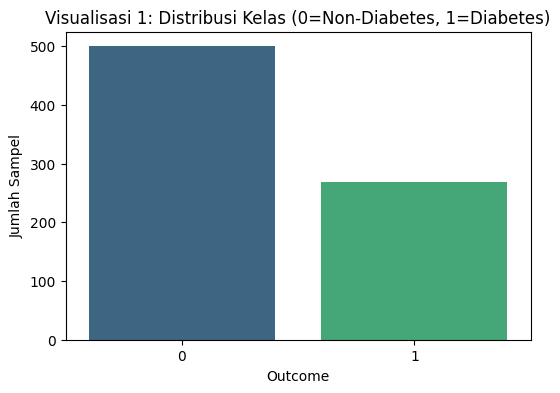

In [ ]:
# Visualisasi 1: Distribusi Kelas (Class Imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Visualisasi 1: Distribusi Kelas (0=Non-Diabetes, 1=Diabetes)')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 700x700 with 0 Axes>

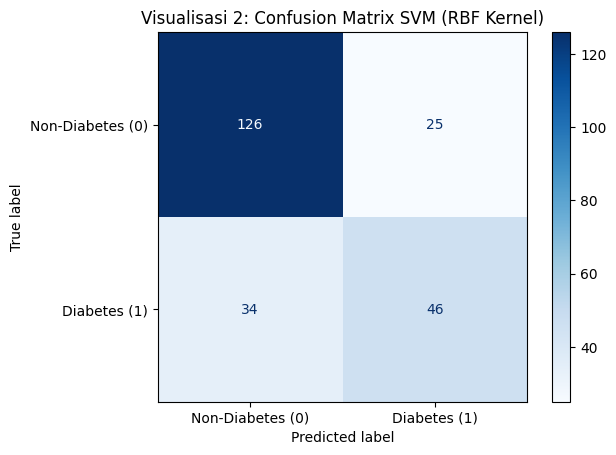

In [ ]:
# Visualisasi 2: Confusion Matrix
# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model_svm.classes_)

# Visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non-Diabetes (0)', 'Diabetes (1)'])

plt.figure(figsize=(7, 7))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Visualisasi 2: Confusion Matrix SVM (RBF Kernel)')
plt.show()

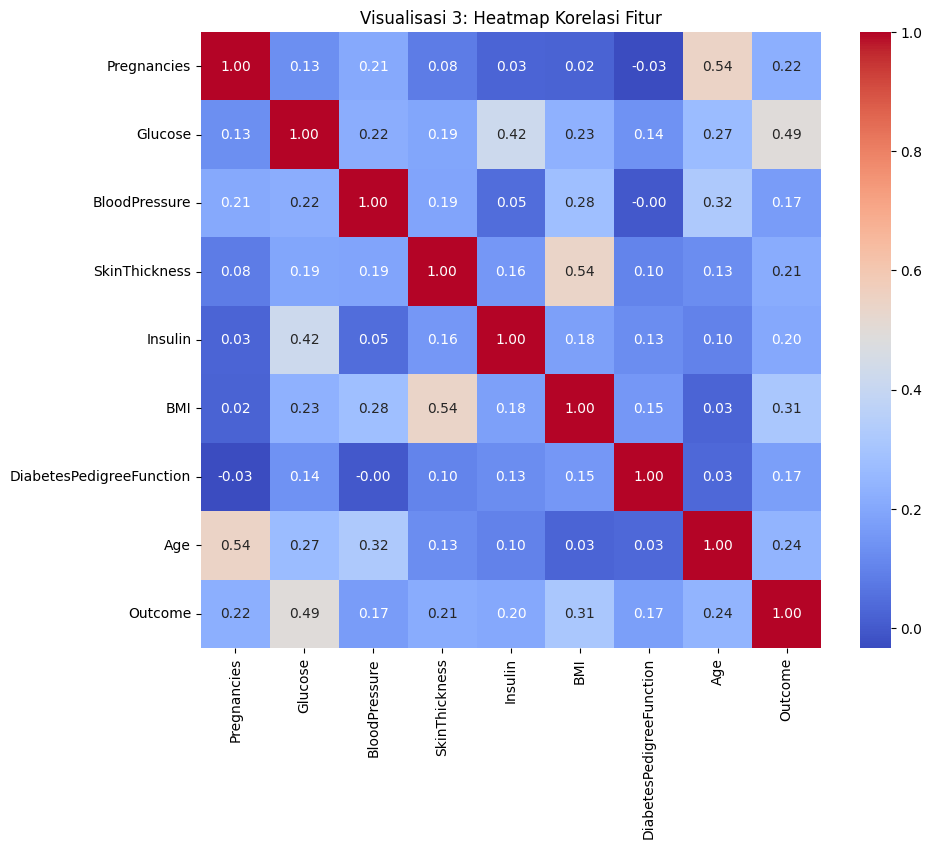

In [ ]:
# Visualisasi 3: Heatmap Korelasi (Fitur Sederhana)
plt.figure(figsize=(10, 8))
sns.heatmap(df_diabetes.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Visualisasi 3: Heatmap Korelasi Fitur')
plt.show()